<a href="https://colab.research.google.com/github/CameronChadwick/data_analysis/blob/main/least_squares_pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# Least Squares

In [3]:
def regression_eqn(ind_array, dep_array, linear=True):
  sum_x_fourth = (ind_array**4).sum()
  sum_x_third = (ind_array**3).sum()
  sum_x_second = (ind_array**2).sum()
  sum_x = (ind_array).sum()
  sum_x_y = (ind_array*dep_array).sum()
  sum_y_x_sqrd = (ind_array**2*dep_array).sum()
  sum_y = (dep_array).sum()
  length = len(ind_array)
  
  if linear:
    lft_matrix = [[sum_x_second, sum_x], [sum_x, length]]
    rt_matrix = [sum_x_y, sum_y]
  else:
    lft_matrix = [[sum_x_fourth, sum_x_third, sum_x_second], [sum_x_third, sum_x_second, sum_x], [sum_x_second, sum_x, length]]
    rt_matrix = [sum_y_x_sqrd, sum_x_y, sum_y]

  solutions = np.linalg.solve(lft_matrix, rt_matrix)
  return solutions

x = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
y = np.array([10.0, 6.0, 2.0, 1.0, 0.0, 2.0, 4.0, 7.0])
regression_eqn(x, y, False)

array([ 0.66666667, -3.71428571,  5.61904762])

## Graphing

In [8]:
def resids(ind_array, dep_array, linear=True):
  
  if linear:
    a = regression_eqn(ind_array, dep_array)
    y_array = a[0]*ind_array+a[1]
  else:
    a = regression_eqn(ind_array, dep_array, False)
    y_array = a[0]*ind_array**2 + a[1]*ind_array + a[2]
  residuals = y_array-dep_array
  resid_mean = residuals.mean()
  resid_dev = residuals.std()
  return residuals, resid_mean, resid_dev



resids(x, y, False)

(array([-3.55271368e-15, -3.80952381e-01,  5.71428571e-01, -1.42857143e-01,
         4.76190476e-01, -5.71428571e-01, -2.85714286e-01,  3.33333333e-01]),
 -6.661338147750939e-16,
 0.3933978962347216)

In [9]:
def error_bounds(mean, std, n, y_int):
  top_line = mean + (n * std)
  bottom_line = mean - (n * std)
  top_int = y_int + top_line
  bottom_int = y_int + bottom_line
  return bottom_int, top_int

error_bounds(resids(x, y, False)[1], resids(x, y, False)[2], 2, regression_eqn(x, y, False)[2])

(4.832251826578174, 6.40584341151706)

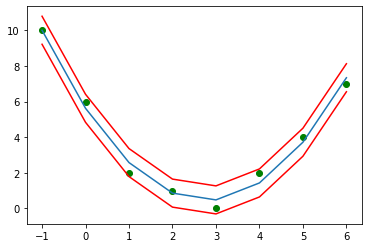

In [12]:
line = resids(x, y, False)[0]
y_int = regression_eqn(x, y, False)[2]
upper_y_int = error_bounds(resids(x, y, False)[1], resids(x, y, False)[2], 2, regression_eqn(x, y, False)[2])[1]
lower_y_int = error_bounds(resids(x, y, False)[1], resids(x, y, False)[2], 2, regression_eqn(x, y, False)[2])[0]

def lines_plot(ind_array, dep_array, n, Linear=True):
  a = regression_eqn(ind_array, dep_array, False)
  y_array = a[0]*ind_array**2 + a[1]*ind_array + a[2]

  residuals = resids(ind_array, dep_array, False)
  error = residuals[1]+n*residuals[2]
  top_array = y_array+error
  bottom_array = y_array-error

  plt.scatter(ind_array, dep_array, c='green')
  plt.plot(ind_array, y_array)
  plt.plot(ind_array, top_array, c='red')
  plt.plot(ind_array, bottom_array, c='red')

lines_plot(x, y, 2, False)